# $$Fraud ~Analytics: fraudes~em~ transações~bancarias$$

### $$Conceito:$$


**A análise de fraudes é o uso de técnicas de análise de big data, combinadas com a interação humana, para detectar e investigar atividades suspeitas ou transações impróprias relacionadas a fraudes financeiras**


**A análise de fraude pode ser uma solução para prevenção, detecção ou ambas. Ele ajuda a prever futuros comportamentos fraudulentos, tornando-o útil para gerenciar riscos, detectar esquemas de fraude mais rapidamente em tempo real e dimensionar a detecção. O Analytics descobre padrões, discrepâncias e anomalias nos dados que, de outra forma, poderiam passar despercebidos**


## $$Técnicas~ de ~análise~ de ~dados~ para~ detecção ~de~ fraudes:$$

### **Aprendizado não supervisionado (Análise Descritiva):**

**1. Método de detecção estatística de valores discrepantes:**

   - **Pontuação padrão/escore z:** calcular a distância do valor fornecido da média de todo o conjunto de valores pode se tornar uma pontuação de risco.
   - **Ponto de interrupção:** observando mudanças repentinas no comportamento de uma determinada entidade
   - **Análise de grupo de pares:** mudanças repentinas em comparação com os pares 
   - **Recência, frequência, valor monetário:** compare se uma determinada entidade difere do RFM esperado
   - **Aprendizagem de regras de associação:** descubra associações ocultas entre diferentes variáveis usando regras if, then
   
   
**2. Algoritmos de agrupamento:**
   - Existem muitos tipos de algoritmos de agrupamento disponíveis, e todos eles visam agrupar um conjunto de objetos com base em sua semelhança entre si em algum sentido e suas diferenças em relação aos outros.
   - Quando se trata de detecção de fraude, você tem uma infinidade de pontos de dados disponíveis para esse tipo de agrupamento, e isso permite descobrir padrões de fraude que um analista humano pode perder.
   
   
   
### **Aprendizado supervisionado (Análise Preditiva):**

**1. Rotulando seu banco de dados histórico:**
   - Você também pode usar uma amostra, mas, se puder, deve usar todos os dados disponíveis. É simplesmente classificar ações e transações históricas como boas ou ruins (fraude ou não), para servir de entrada para suas análises ou modelos de aprendizado
   

**2. Padrão de fraude e análise de variáveis:**
   - Nem todas as variáveis são iguais, e esta etapa serve como uma verificação de sanidade. Desconsidere as informações que são distribuídas tão igualmente que não servem como um indicador significativo, pois apenas adicionarão ruído ao seu modelo
   
   
**3. Modelagem de dados:**
   - Usando a metodologia fornecida acima, agora você pode encontrar discrepâncias ou ações arriscadas que você não considerou anteriormente. Com esses novos insights, você deve ser capaz de identificar quais são os fortes indicadores de fraude, permitindo que você estabeleça regras contra ela
   
   
**4. Implementação do modelo:**
   - Uma das formas é usando algoritimos de Machine Learning: KNN, Random Forest, Redes Neurais, Naive Bayes, etc.
   
   
**5. Monitoramento e feedback:**
   - Com o tempo, seus modelos implementados podem ficar desatualizados, enquanto a fraude pode mudar para escapar da detecção, é por isso que você precisa monitorar seus resultados de tempos em tempos e fazer ajustes de acordo

## $$Objetivo:$$  

## $$Identificar~ as~ variáveis~ mais ~relevantes~ para~ detecção~ de~ fraudes$$$$ ~em ~transações~ bancarias$$

In [1]:
#Carregar os pacotes
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns

# Base de Dados 

In [2]:
# Carrega o dataset
dados = pd.read_csv("fraud.csv",sep=',')
dados

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


**Dataset contém 6.362.620 registros e 11 variáveis.**

# Dicionário de Dados



### **$$Variáveis:$$**

- **step:** 1 step é 1 hora de tempo. Total de step 744 (simulação de 31 dias).


- **type:** Tipo de transação financeira

    
- **amount:** Valor da transação


- **nameOrig:**  Cliente que iniciou a transação


- **oldbalanceOrg:**  Saldo inicial antes da transação


- **newbalanceOrig:** Novo saldo após a transação


- **nameDest:** Cliente que é o destinatário da transação


- **oldbalanceDest:** Destinatário do saldo inicial antes da transação. Observe que não há informações para clientes que começam com M (Comerciantes).


- **newbalanceDest:** Novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).


- **isFraud:** São as transações feitas pelos agentes fraudulentos


- **isFlaggedFraud:** Sinaliza tentativas ilegais de fraude, uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


# Análise Exploratória

In [3]:
# Tipos de dados das colunas
tipo = dados.dtypes
tipo = tipo.to_frame()
tipo.columns = ['Type']
tipo

,Type
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [4]:
# Verifica o total de valores únicos por coluna
tipo['Unique']= dados.nunique()
tipo

,Type,Unique
step,int64,743
type,object,5
amount,float64,5316900
nameOrig,object,6353307
oldbalanceOrg,float64,1845844
newbalanceOrig,float64,2682586
nameDest,object,2722362
oldbalanceDest,float64,3614697
newbalanceDest,float64,3555499
isFraud,int64,2


**Todas as variáveis estão com o type definidos corretamente**

In [5]:
# Verificar se existe valores nulos
dados.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#Verificar se existe dados duplicados
sum(dados.duplicated())

0

**Não existe dados nulos e nem duplicados no dataset**

In [7]:
#Verificar todos os dados preenchidos de cada coluna

for i in dados.columns:
    print(f'\nColuna: {i}, {dados[i].unique()}')


Coluna: step, [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243

**Note que todas os valores estão coerentes, vamos apenas transformar a variável 'step' em formato de horas(24H), para conseguir tirar insights**

In [49]:
#Transformar a variável 'step' em hora
dados['hour'] =  dados.step % 24


#Excluir a variável 'step'
dados = dados.drop('step',axis=1)

#Verificar os dados da variável 'hour'
dados.hour.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int64)

**Note que agora a variável está em formato de horas**

## Análise das variáveis:

**Variável Target: isFraud**



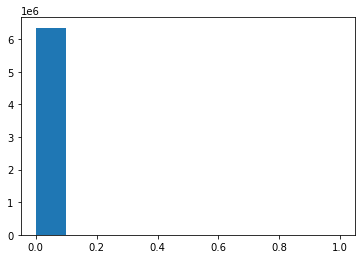

In [50]:
#Plot
plt.hist(dados.isFraud);

In [51]:
a = len(dados[dados.isFraud==0])
b = len(dados[dados.isFraud==1])
total = len(dados)

print(f'Porcentagem de não fraudes em transações: {round(a/total*100,2)}')
print(f'Porcentagem de fraudes em transações: {round(b/total*100,2)}')


Porcentagem de não fraudes em transações: 99.87
Porcentagem de fraudes em transações: 0.13


**Note que temos um problema com a distribuições das classes, esse desbalanceamento faz com que os algoritimos não tenha tanta precisão nas previsões dos dados em uma das classes, vamos ter que usar a técnica de amostragem para equilibrar os dados, em fraudes essa porcentagem é normal, devido ao número baixo de fraudes em transações financeiras**

## Análise dos dados numéricos VS variável target

In [52]:
#Selecionar as variáveis numericas
import warnings
warnings.filterwarnings('ignore')
var_num = dados.select_dtypes(['float','int']).columns
var_num = dados[var_num]



var_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
 7   hour            int64  
dtypes: float64(5), int64(3)
memory usage: 388.3 MB


In [53]:
#Teste de Shapiro, verificar se as variáveis tem distribuição normal
import scipy.stats as stats
for i in var_num.columns:
    shapiro_stats, shapiro_p_valor = stats.shapiro(var_num[i][0:500])
    if shapiro_p_valor > 0.05:
        print(f'\nVariável:{i}, P_valor:{shapiro_p_valor:.2f}, Maior que 0.05 ,Tem Distribuiçao Normal')
    else:
        print(f'\nVariável:**{i}**, P_valor:{shapiro_p_valor:.2f}, Não tem distribuição normal')


Variável:**amount**, P_valor:0.00, Não tem distribuição normal

Variável:**oldbalanceOrg**, P_valor:0.00, Não tem distribuição normal

Variável:**newbalanceOrig**, P_valor:0.00, Não tem distribuição normal

Variável:**oldbalanceDest**, P_valor:0.00, Não tem distribuição normal

Variável:**newbalanceDest**, P_valor:0.00, Não tem distribuição normal

Variável:**isFraud**, P_valor:0.00, Não tem distribuição normal

Variável:isFlaggedFraud, P_valor:1.00, Maior que 0.05 ,Tem Distribuiçao Normal

Variável:hour, P_valor:1.00, Maior que 0.05 ,Tem Distribuiçao Normal


**Dependendo do tipo de distribuição, os dados serão analisados através da média ou mediana**

- Distribuição Normal = Analise é feita com a média entre os dados


- Não tem distribuição normal = Analise é feita com a mediana entre os dados

### hour

In [13]:
#Separar os dados da classe 0 e 1
fraud_0 = var_num.loc[(var_num['isFraud']==0)]
fraud_1 = var_num.loc[(var_num['isFraud']==1)]


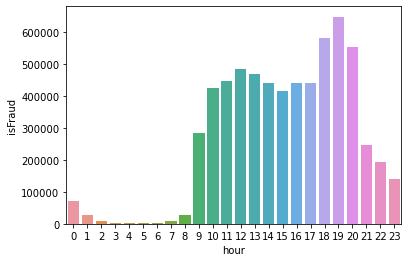

In [14]:
#Verificar os horários mais frequentes das transações não fraudulentas
a =fraud_0.groupby('hour')['isFraud'].count()
a = a.to_frame()
sns.barplot(x=a.index,y=a.isFraud)
plt.show()

**A maioria das transações são feitas em horario comercial**

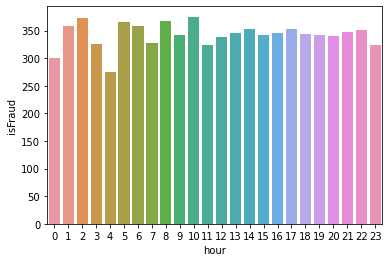

In [15]:
#Verificar os horários mais frequentes das transações fraudulentas
a =fraud_1.groupby('hour')['isFraud'].count()
a = a.to_frame()
sns.barplot(x=a.index,y=a.isFraud)
plt.show()

**Observe que ao longo do dia, não há um horario especifico para ocorrer transações fraudulentas, porém a uma significância no horario noturno em relação as transações não fraudulentas**

### amount

In [16]:
#Mediana das classes fraud e não fraud
#classe 0
fraud_0 = var_num.loc[(var_num['isFraud']==0)]
a = fraud_0['amount'].median()

#Classe 1
fraud_1 = var_num.loc[(var_num['isFraud']==1)]
b = fraud_1['amount'].median()

print(f'Classe 0  = {round(a,2)}')
print(f'Classe 1 = {round(b,2)}')

Classe 0  = 74684.72
Classe 1 = 441423.44


In [17]:
#Analise descritiva das 2 classes
a = round(fraud_0['amount'].describe())
a = a.to_frame()

b = round(fraud_1['amount'].describe())
b =b.to_frame()
a['Fraud'] = b
a.columns  = ['N_fraud','Fraud']
a

,N_fraud,Fraud
count,6354407.0,8213.0
mean,178197.0,1467967.0
std,596237.0,2404253.0
min,0.0,0.0
25%,13368.0,127091.0
50%,74685.0,441423.0
75%,208365.0,1517771.0
max,92445517.0,10000000.0


**Há significância na mediana da variável 'amount', quanto maior o valor da transação maior a probabilidade do cliente está cometendo fraude**

### oldbalanceOrg

In [18]:
#Mediana das classes fraud e não fraud
#classe 0
fraud_0 = var_num.loc[(var_num['isFraud']==0)]
a = fraud_0['oldbalanceOrg'].median()

#Classe 1
fraud_1 = var_num.loc[(var_num['isFraud']==1)]
b = fraud_1['oldbalanceOrg'].median()

print(f'Classe 0  = {round(a,2)}')
print(f'Classe 1 = {round(b,2)}')

Classe 0  = 14069.0
Classe 1 = 438983.45


In [19]:
#Analise descritiva das 2 classes
a = round(fraud_0['oldbalanceOrg'].describe())
a = a.to_frame()

b = round(fraud_1['oldbalanceOrg'].describe())
b =b.to_frame()
a['Fraud'] = b
a.columns  = ['N_fraud','Fraud']
a

,N_fraud,Fraud
count,6354407.0,8213.0
mean,832829.0,1649668.0
std,2887144.0,3547719.0
min,0.0,0.0
25%,0.0,125822.0
50%,14069.0,438983.0
75%,106970.0,1517771.0
max,43818855.0,59585040.0


**Há significância na mediana da variável 'oldbalanceOrg', quanto maior o valor do saldo da conta de origem antes da transação, maior a chance de fraude**

### newbalanceOrig

In [20]:
#Mediana das classes fraud e não fraud
#classe 0
fraud_0 = var_num.loc[(var_num['isFraud']==0)]
a = fraud_0['newbalanceOrig'].median()

#Classe 1
fraud_1 = var_num.loc[(var_num['isFraud']==1)]
b = fraud_1['newbalanceOrig'].median()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 1 = {round(b,2)}')

Classe 0 = 0.0
Classe 1 = 0.0


In [21]:
#Analise descritiva das 2 classes
a = round(fraud_0['newbalanceOrig'].describe())
a = a.to_frame()

b = round(fraud_1['newbalanceOrig'].describe())
b =b.to_frame()
a['Fraud'] = b
a.columns  = ['N_fraud','Fraud']
a

,N_fraud,Fraud
count,6354407.0,8213.0
mean,855970.0,192393.0
std,2924987.0,1965666.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,144731.0,0.0
max,43686616.0,49585040.0


**Não há significância na mediana da variável 'newbalanceOrig'**

### oldbalanceDest

In [22]:
#Separar os dados de destino em : C = Pessoa fisica  , M = Pessoa Juridica
m = dados[dados.nameDest.str.contains("M", regex=False)]
c = dados[dados.nameDest.str.contains("C", regex=False)]

a = m['oldbalanceDest'].describe()
a = a.to_frame()

b = round(c['oldbalanceDest'].describe())
b = b.to_frame()
a['Pessoa fisica'] = b
a.columns  = ['Pessoa Juridica','Pessoa fisica']
a

,Pessoa Juridica,Pessoa fisica
count,2151495.0,4211125.0
mean,0.0,1663058.0
std,0.0,4064780.0
min,0.0,0.0
25%,0.0,139659.0
50%,0.0,551247.0
75%,0.0,1692951.0
max,0.0,356015889.0


**Note que a variável ('oldbalanceDest') está com os dados zerados para Pessoa Jurídica, vamos apenas analisar os dados da Pessoa física**

In [23]:
#classe 0
fraud_0 = c.loc[(c['isFraud']==0)]
a = fraud_0['oldbalanceDest'].median()

#Classe 1
fraud_1 = c.loc[(c['isFraud']==1)]
b = fraud_1['oldbalanceDest'].median()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 1 = {round(b,2)}')

Classe 0 = 552879.66
Classe 1 = 0.0


In [24]:
#Analise descritiva das 2 classes
a = round(fraud_0['oldbalanceDest'].describe())
a = a.to_frame()

b = round(fraud_1['oldbalanceDest'].describe())
b =b.to_frame()
a['Fraud'] = b
a.columns  = ['N_fraud','Fraud']
a

,N_fraud,Fraud
count,4202912.0,8213.0
mean,1665245.0,544250.0
std,4065775.0,3336421.0
min,0.0,0.0
25%,140915.0,0.0
50%,552880.0,0.0
75%,1695674.0,147829.0
max,356015889.0,236230517.0


**Há significância na mediana da variável 'oldbalanceDest', quanto menor o valor do saldo antes da transação financeira da conta destino, maior a chance da fraude**

### newbalanceDest

In [25]:
#classe 0
fraud_0 = c.loc[(c['isFraud']==0)]
a = fraud_0['newbalanceDest'].median()

#Classe 1
fraud_1 = c.loc[(c['isFraud']==1)]
b = fraud_1['newbalanceDest'].median()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 1  =  {round(b,2)}')

Classe 0 = 684780.38
Classe 1  =  4676.42


In [26]:
#Analise descritiva das 2 classes
a = round(fraud_0['newbalanceDest'].describe())
a = a.to_frame()

b = round(fraud_1['newbalanceDest'].describe())
b =b.to_frame()
a['Fraud'] = b
a.columns  = ['N_fraud','Fraud']
a

,N_fraud,Fraud
count,4202912.0,8213.0
mean,1851972.0,1279708.0
std,4386890.0,3908817.0
min,0.0,0.0
25%,222549.0,0.0
50%,684780.0,4676.0
75%,1912209.0,1058725.0
max,356179279.0,236726495.0


**Há significância na mediana da variável 'newbalanceDest', quanto maior a mediana do saldo da conta destino após a transação, menor a chance de fraude, isso se dá por conta que a maioria das transações fraudulentas fica zerada antes da transação**

### isFlaggedFraud

In [27]:
#Analisa do registros da variável 
a =len(var_num[var_num.isFlaggedFraud==0])
b = len(var_num[var_num.isFlaggedFraud==1])

print(f'Classe 0, numeros de registros: {a}')
print(f'classe 1, numeros de registros: {b}')

Classe 0, numeros de registros: 6362604
classe 1, numeros de registros: 16


**Temos apenas 16 registros da classe 1, a variável está totalmente enviesada não agregando em nada para predição do modelo**

## Conclusão da análise das variáveis Numéricas

**Feita a análise de dados, podemos concluir que há diferença entre as medianas nas variáveis: 'hour', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceDest'**

## Análise de correlação entre as variáveis Numéricas

- Usaremos a correlação de Pearson para excluir algumas variáveis com multicolinearidade


- Variáveis acima de 0.8 em modulo serão consideradas com multicolinearidade


In [28]:
#Selecionar as variáveis que foram identificada como relevantes para a modelagem
var_select_num = var_num[[ 'hour', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceDest','isFraud']]

In [29]:
#Correlação
var_select_num.corr()

,hour,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
hour,1.000000,-0.029676,-0.001015,-0.001564,-0.006697,-0.031403
amount,-0.029676,1.000000,-0.002762,0.294137,0.459304,0.076688
oldbalanceOrg,-0.001015,-0.002762,1.000000,0.066243,0.042029,0.010154
oldbalanceDest,-0.001564,0.294137,0.066243,1.000000,0.976569,-0.005885
newbalanceDest,-0.006697,0.459304,0.042029,0.976569,1.000000,0.000535
isFraud,-0.031403,0.076688,0.010154,-0.005885,0.000535,1.000000


**Observe que as variáveis 'oldbalanceDest' e 'newbalanceDest' tem correlação quase perfeita, vamos excluir a variável 'newbalanceDest', para não ter problemas com multicolinearidade na modelagem**

In [30]:
#Excluir a variável 'newbalanceDest'
var_select_num = var_select_num.drop('newbalanceDest',axis=1)
var_select_num.head(2)

,hour,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,1,9839.64,170136.0,0.0,0
1,1,1864.28,21249.0,0.0,0


In [31]:
#Variavel oldbalanceDest

#Separar os dados de destino em : C = Pessoa fisica  , M = Pessoa Juridica
m = dados[dados.nameDest.str.contains("M", regex=False)]
c = dados[dados.nameDest.str.contains("C", regex=False)]


a = round(m['oldbalanceDest'].describe())
a = a.to_frame()

b = round(c['oldbalanceDest'].describe())
b =b.to_frame()
a['Pessoa fisica'] = b
a.columns  = ['Pessoa Juridica','Pessoa fisica']
a

,Pessoa Juridica,Pessoa fisica
count,2151495.0,4211125.0
mean,0.0,1663058.0
std,0.0,4064780.0
min,0.0,0.0
25%,0.0,139659.0
50%,0.0,551247.0
75%,0.0,1692951.0
max,0.0,356015889.0


**Observe que a classe da pessoa jurídica não tem dados, portanto para não excluir muitos dados deixando somente a classe da pessoa física, vamos excluir essa variável**

In [32]:
#Exlcuir variável oldbalanceDest
var_select_num = var_select_num.drop('oldbalanceDest',axis=1)
var_select_num.head(2)

,hour,amount,oldbalanceOrg,isFraud
0,1,9839.64,170136.0,0
1,1,1864.28,21249.0,0


**Variáveis numéricas selecionadas como relevantes para modelagem**

## Analise dos dados Categóricas X Target

**Vamos considerar como relevantes as variáveis das quais as categorias com as probabilidade da classe 1, seja maior que 0.2%**

In [33]:
#Selecionar as variáveis categoricas
var_cat = dados.select_dtypes(['object']).columns
var_cat = dados[var_cat]

#Adicionar a variavel target para analise
var_cat['isFraud'] = dados['isFraud']

var_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   type      object
 1   nameOrig  object
 2   nameDest  object
 3   isFraud   int64 
dtypes: int64(1), object(3)
memory usage: 194.2+ MB


**Filtrando as variáveis categóricas e a variável target para as analises**

### type

In [34]:
#Criar as probabilidades
type_ = pd.crosstab(var_cat.isFraud,var_cat.type)
type_/type_.aggregate(np.sum)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1.0,0.99816,1.0,1.0,0.992312
1,0.0,0.00184,0.0,0.0,0.007688


**Não há significância nas probabilidades da classe 1 na variável type**

### nameDest

In [35]:
#Separar os dados de destino em : C = Pessoa fisica  , M = Pessoa Juridica
m = var_cat[var_cat.nameDest.str.contains("M", regex=False)]
c = var_cat[var_cat.nameDest.str.contains("C", regex=False)]


In [36]:
#Quantidade de fraudes com pessoa fisica e juridica
a = len(c[c.isFraud==1])
b = len(m[m.isFraud==1])

print(f'Pessoa fisica: {a}')
print(f'Pessoa Juridica: {b}')

Pessoa fisica: 8213
Pessoa Juridica: 0


**Observe que como o dataset não tem dados para conta de destino(M = Pessoa Jurídica), não há como identificar as fraudes para esses clientes, por motivos já vistos na análise numérica, vamos excluir essa variável**

## Conclusão da análise exploratória dos dados

**Como visto na análise das variáveis categóricas, não vamos selecionar nenhuma das variáveis**

## Variáveis Relevantes para predição

In [37]:
#Selecionar as variáveis relevante para modelagem
dados_relev = var_select_num
dados_relev

,hour,amount,oldbalanceOrg,isFraud
0,1,9839.64,170136.00,0
1,1,1864.28,21249.00,0
2,1,181.00,181.00,1
3,1,181.00,181.00,1
4,1,11668.14,41554.00,0
...,...,...,...,...
6362615,23,339682.13,339682.13,1
6362616,23,6311409.28,6311409.28,1
6362617,23,6311409.28,6311409.28,1
6362618,23,850002.52,850002.52,1


**Todas as variáveis identificadas como relevantes na análise exploratória**

In [38]:
#Dados nulos
dados_relev.isnull().sum()

hour             0
amount           0
oldbalanceOrg    0
isFraud          0
dtype: int64

In [39]:
#shape
dados_relev.shape

(6362620, 4)

**Temos 6.362.620 registros, com 3 variáveis preditoras e 1 variável target**

# Modelagem:

- Como o objetivo é identificar o risco de fraude em uma instituição financeira através das transações bancarias dos clientes, vamos usar como critério a métrica Recall para determinar o melhor resultado, pois indica o quanto da classe 1 (Fraude) o algoritimo acerta

## Dividir os dados em treino e teste

In [40]:
#Separar os dados em x e y
x = dados_relev.iloc[:,0:3]
y = dados_relev.iloc[:,3]

#Separar as variaveis em treino e teste
from sklearn.model_selection import train_test_split
X_treino,X_teste,Y_treino,Y_teste=train_test_split(x,y,
                                                   test_size=0.3,random_state=1)

## Under Sampling

- Como temos muitos dados, podemos aplicar o algoritimo Under Sampling

In [43]:
#Aplicando o balancemanto nos dados
from imblearn.under_sampling import RandomUnderSampler
smt = RandomUnderSampler()
x_smote, y_smote = smt.fit_resample(X_treino, Y_treino)
print(f'Numero de exemplos da variavel target Antes: {len(y)}')
print(f'Numero de exemplos da variavel target com under_sampling: {len(y_smote)}')

print(f'\nNumero de exemplos da Classe 0: {len(y_smote[y_smote==0])}')
print(f'Numero de exemplos da Classe 1: {len(y_smote[y_smote==1])}')

Numero de exemplos da variavel target Antes: 6362620
Numero de exemplos da variavel target com under_sampling: 11490

Numero de exemplos da Classe 0: 5745
Numero de exemplos da Classe 1: 5745


**Agora podemos ver equilíbrio nas classes da variável target no dataset de treino**

# Modelo 1 - Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Construção do Classificador
random_forest = RandomForestClassifier() 

#Treinar o modelo com os dados de treino
modelo_random =  random_forest.fit(x_smote, y_smote)


#Previsões com o modelo de teste
previsoes_v1 = modelo_random.predict(X_teste)

# Dicionário de métricas e metadados
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
rf1 = {'Acurácia_Treino':modelo_random.score(x_smote, y_smote),
               'Acurácia_Teste':accuracy_score(Y_teste,previsoes_v1),
               'Precision_Teste':precision_score(Y_teste,previsoes_v1),
               'Recall_Teste':recall_score(Y_teste,previsoes_v1),
               'AUC_Teste':roc_auc_score(Y_teste, previsoes_v1)}
# Print

metricas = pd.DataFrame(rf1.items(),columns=[['Metricas','RF1']]);metricas

,Metricas,RF1
0,Acurácia_Treino,1.000000
1,Acurácia_Teste,0.966025
2,Precision_Teste,0.036344
3,Recall_Teste,0.990681
4,AUC_Teste,0.978337


<AxesSubplot:>

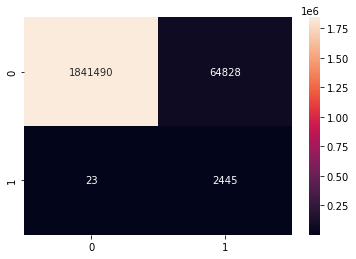

In [45]:
#Matriz de Confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_teste,previsoes_v1)
sns.heatmap(cm,annot=True,fmt='d')

**O modelo Random Forest teve um ótimo desempenho na maioria de suas metricas, porém o objetivo é diminuir o máximo de falsos negativos, e essa métrica houve um excelente desempenho chegando praticamente a 99% de acerto**

# Modelo 2 - Redes Neurais

In [46]:
from sklearn.neural_network import MLPClassifier

rede_neural_credit1 = MLPClassifier(max_iter=1500, verbose=True,
                                   solver = 'adam', activation = 'relu',n_iter_no_change=40,learning_rate_init=0.0001,
                                   hidden_layer_sizes = (50,50))
rede_neural_credit1.fit(x_smote, y_smote)



Iteration 1, loss = 16.85597782
Iteration 2, loss = 2.88094909
Iteration 3, loss = 2.35110817
Iteration 4, loss = 2.49266976
Iteration 5, loss = 2.47430618
Iteration 6, loss = 2.43400101
Iteration 7, loss = 2.30597962
Iteration 8, loss = 2.17335767
Iteration 9, loss = 2.00450048
Iteration 10, loss = 2.25642548
Iteration 11, loss = 2.01467524
Iteration 12, loss = 2.50961071
Iteration 13, loss = 2.89907506
Iteration 14, loss = 2.10389938
Iteration 15, loss = 2.32625938
Iteration 16, loss = 2.11156287
Iteration 17, loss = 2.46621565
Iteration 18, loss = 1.99088399
Iteration 19, loss = 2.22976289
Iteration 20, loss = 1.85501964
Iteration 21, loss = 3.35018024
Iteration 22, loss = 2.96106372
Iteration 23, loss = 2.45593024
Iteration 24, loss = 2.41555169
Iteration 25, loss = 2.44876700
Iteration 26, loss = 2.01598324
Iteration 27, loss = 2.47593530
Iteration 28, loss = 2.14062561
Iteration 29, loss = 2.01089826
Iteration 30, loss = 2.39088170
Iteration 31, loss = 2.05154967
Iteration 32, lo

MLPClassifier(hidden_layer_sizes=(50, 50), learning_rate_init=0.0001,
              max_iter=1500, n_iter_no_change=40, verbose=True)

In [47]:
#Previsões com o modelo de teste
previsoes_v1 = rede_neural_credit1.predict(X_teste)

# Dicionário de métricas e metadados
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
rn1 = {'Acurácia_Treino':rede_neural_credit1.score(x_smote, y_smote),
               'Acurácia_Teste':accuracy_score(Y_teste,previsoes_v1),
               'Precision_Teste':precision_score(Y_teste,previsoes_v1),
               'Recall_Teste':recall_score(Y_teste,previsoes_v1),
               'AUC_Teste':roc_auc_score(Y_teste,previsoes_v1)}
# Print

metricas['RN1'] = rn1.values()
metricas

,Metricas,RF1,RN1
0,Acurácia_Treino,1.000000,0.900261
1,Acurácia_Teste,0.966025,0.811314
2,Precision_Teste,0.036344,0.006738
3,Recall_Teste,0.990681,0.989870
4,AUC_Teste,0.978337,0.900476


<AxesSubplot:>

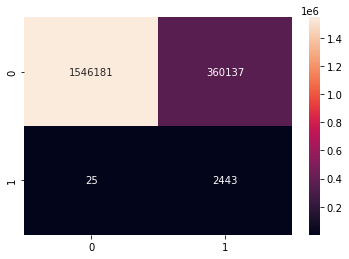

In [48]:
#Matriz de Confusão

cm = confusion_matrix(Y_teste,previsoes_v1)
sns.heatmap(cm,annot=True,fmt='d')

**O modelo de Redes Neurais teve praticamente o mesmo desempenho do algoritimo Random Forest**

# Conclusão:

**Fraud Analyticss é um processo diferente dos demais, pois existe apenas uma classe predominante na variável target, e isso dificulta o treinamento dos modelos.**

**Com a analise exploratória dos dados, conseguimos selecionar as variáveis mais relevantes para a modelagem, como tínhamos muitos dados no dataset, aplicamos o algoritimo Under Sampling para balancear as classes, evitando criar dados sintéticos.** 

**Na modelagem preditiva usamos 2 algoritimos de ML: Random forest e Redes Neurais, com o objetivo de ter uma taxa baixa de Falso negativo, os algoritimos tiveram uma excelente performance de aproximadamente 99% de acerto, porém a precisão da classe 1 é muito baixa, isso quer dizer que apesar do algoritimo detectar quase todas as fraudes, ele também erra quando diz que é fraude mais não é, mas levando em conta que essa etapa pode ser a 1° entre outras, consideramos um ótimo caminho a se seguir, pois apenas 1% dos dados coletados terá erro quando o assunto é detecção de transações com fraudes**
